In [ ]:
# https://www.kaggle.com/code/ankitapandav1212/dry-bean-dataset-using-knn-algorithm
# https://www.kaggle.com/code/ankitapandav1212/dry-bean-dataset-using-knn-algorithm?scriptVersionId=112288982&cellId=6
# to learn:
# data.info(), data.describe()
# https://www.kaggle.com/code/ankitapandav1212/dry-bean-dataset-using-knn-algorithm?scriptVersionId=112288982&cellId=20
# to learn:
# Imbalncing Technique, StratifiedKFold (?)

# https://www.kaggle.com/code/ziadhamadafathy/classify-dry-bean-with-accuracy-90-by-some-models
# to learn:
# sns.countplot(df['Class']), df['Class'].value_counts()
# SelectKBest for feature reduction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [13]:
iris = pd.read_csv("simp_bean.csv")
x = iris.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].values
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             75 non-null     int64  
 1   Perimeter        75 non-null     float64
 2   MajorAxisLength  75 non-null     float64
 3   MinorAxisLength  75 non-null     float64
 4   AspectRation     75 non-null     float64
 5   Eccentricity     75 non-null     float64
 6   ConvexArea       75 non-null     int64  
 7   EquivDiameter    75 non-null     float64
 8   Extent           75 non-null     float64
 9   Solidity         75 non-null     float64
 10  roundness        75 non-null     float64
 11  Compactness      75 non-null     float64
 12  ShapeFactor1     75 non-null     float64
 13  ShapeFactor2     75 non-null     float64
 14  ShapeFactor3     75 non-null     float64
 15  ShapeFactor4     75 non-null     float64
 16  Class            75 non-null     object 
dtypes: float64(14), in

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   
6  30477    670.033       211.050155       184.039050      1.146768   
7  30519    629.727       212.996755       182.737204      1.165591   
8  30685    635.681       213.534145       183.157146      1.165852   
9  30834    631.934       217.227813       180.897469      1.200834   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6      0.489478       30970     196.988633  0.762402  0.984081   0.853080   
7      0.513760       30847     197.124320  0.770682  0.989367   0.967109   
8      0.514081       31044     197.659696  0.771561  0.988436   0.954240   
9      0.553642       31120     198.139012  0.783683  0.990810   0.970278   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER  
5     0.923726      0.007020      0.003153      0.853270      0.999236  SEKER  
6     0.933374      0.006925      0.003242      0.871186      0.999049  SEKER  
7     0.925480      0.006979      0.003158      0.856514      0.998345  SEKER  
8     0.925658      0.006959      0.003152      0.856844      0.998953  SEKER  
9     0.912125      0.007045      0.003008      0.831973      0.999061  SEKER

In [4]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["Class"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0     count
Class          
BARBUNYA     15
BOMBAY       15
CALI         15
HOROZ        15
SEKER        15

In [5]:
iris_1=iris.loc[iris["Class"]=="SEKER"]
iris_2=iris.loc[iris["Class"]=="BARBUNYA"]
iris_3=iris.loc[iris["Class"]=="BOMBAY"]
iris_4=iris.loc[iris["Class"]=="CALI"]
iris_5=iris.loc[iris["Class"]=="HOROZ"]

/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users

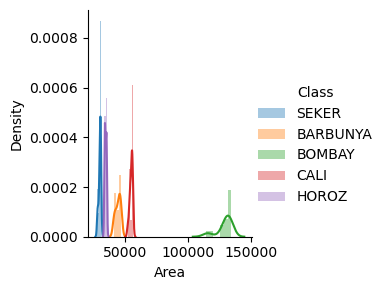

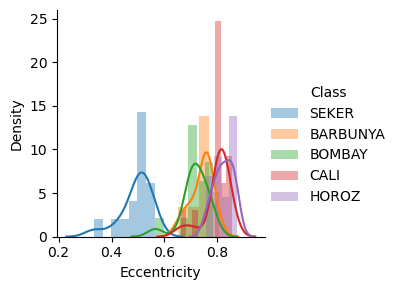

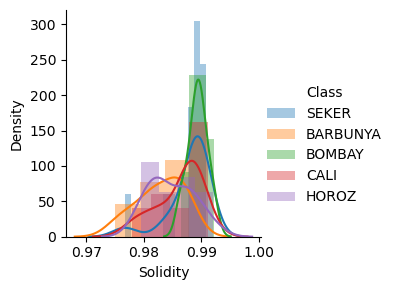

In [6]:
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"Area").add_legend()
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"Eccentricity").add_legend()
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"Solidity").add_legend()
plt.show()

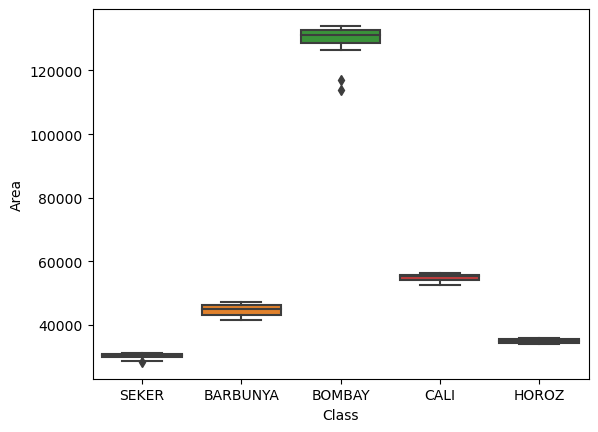

In [8]:
sns.boxplot(x="Class",y="Area",data=iris)
plt.show()

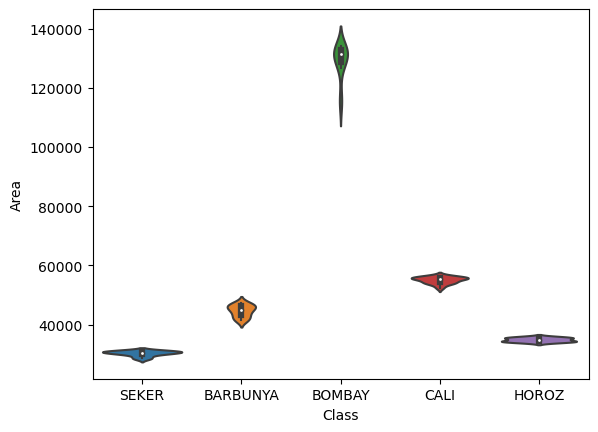

In [11]:
sns.violinplot(x="Class",y="Area",data=iris)
plt.show()

/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


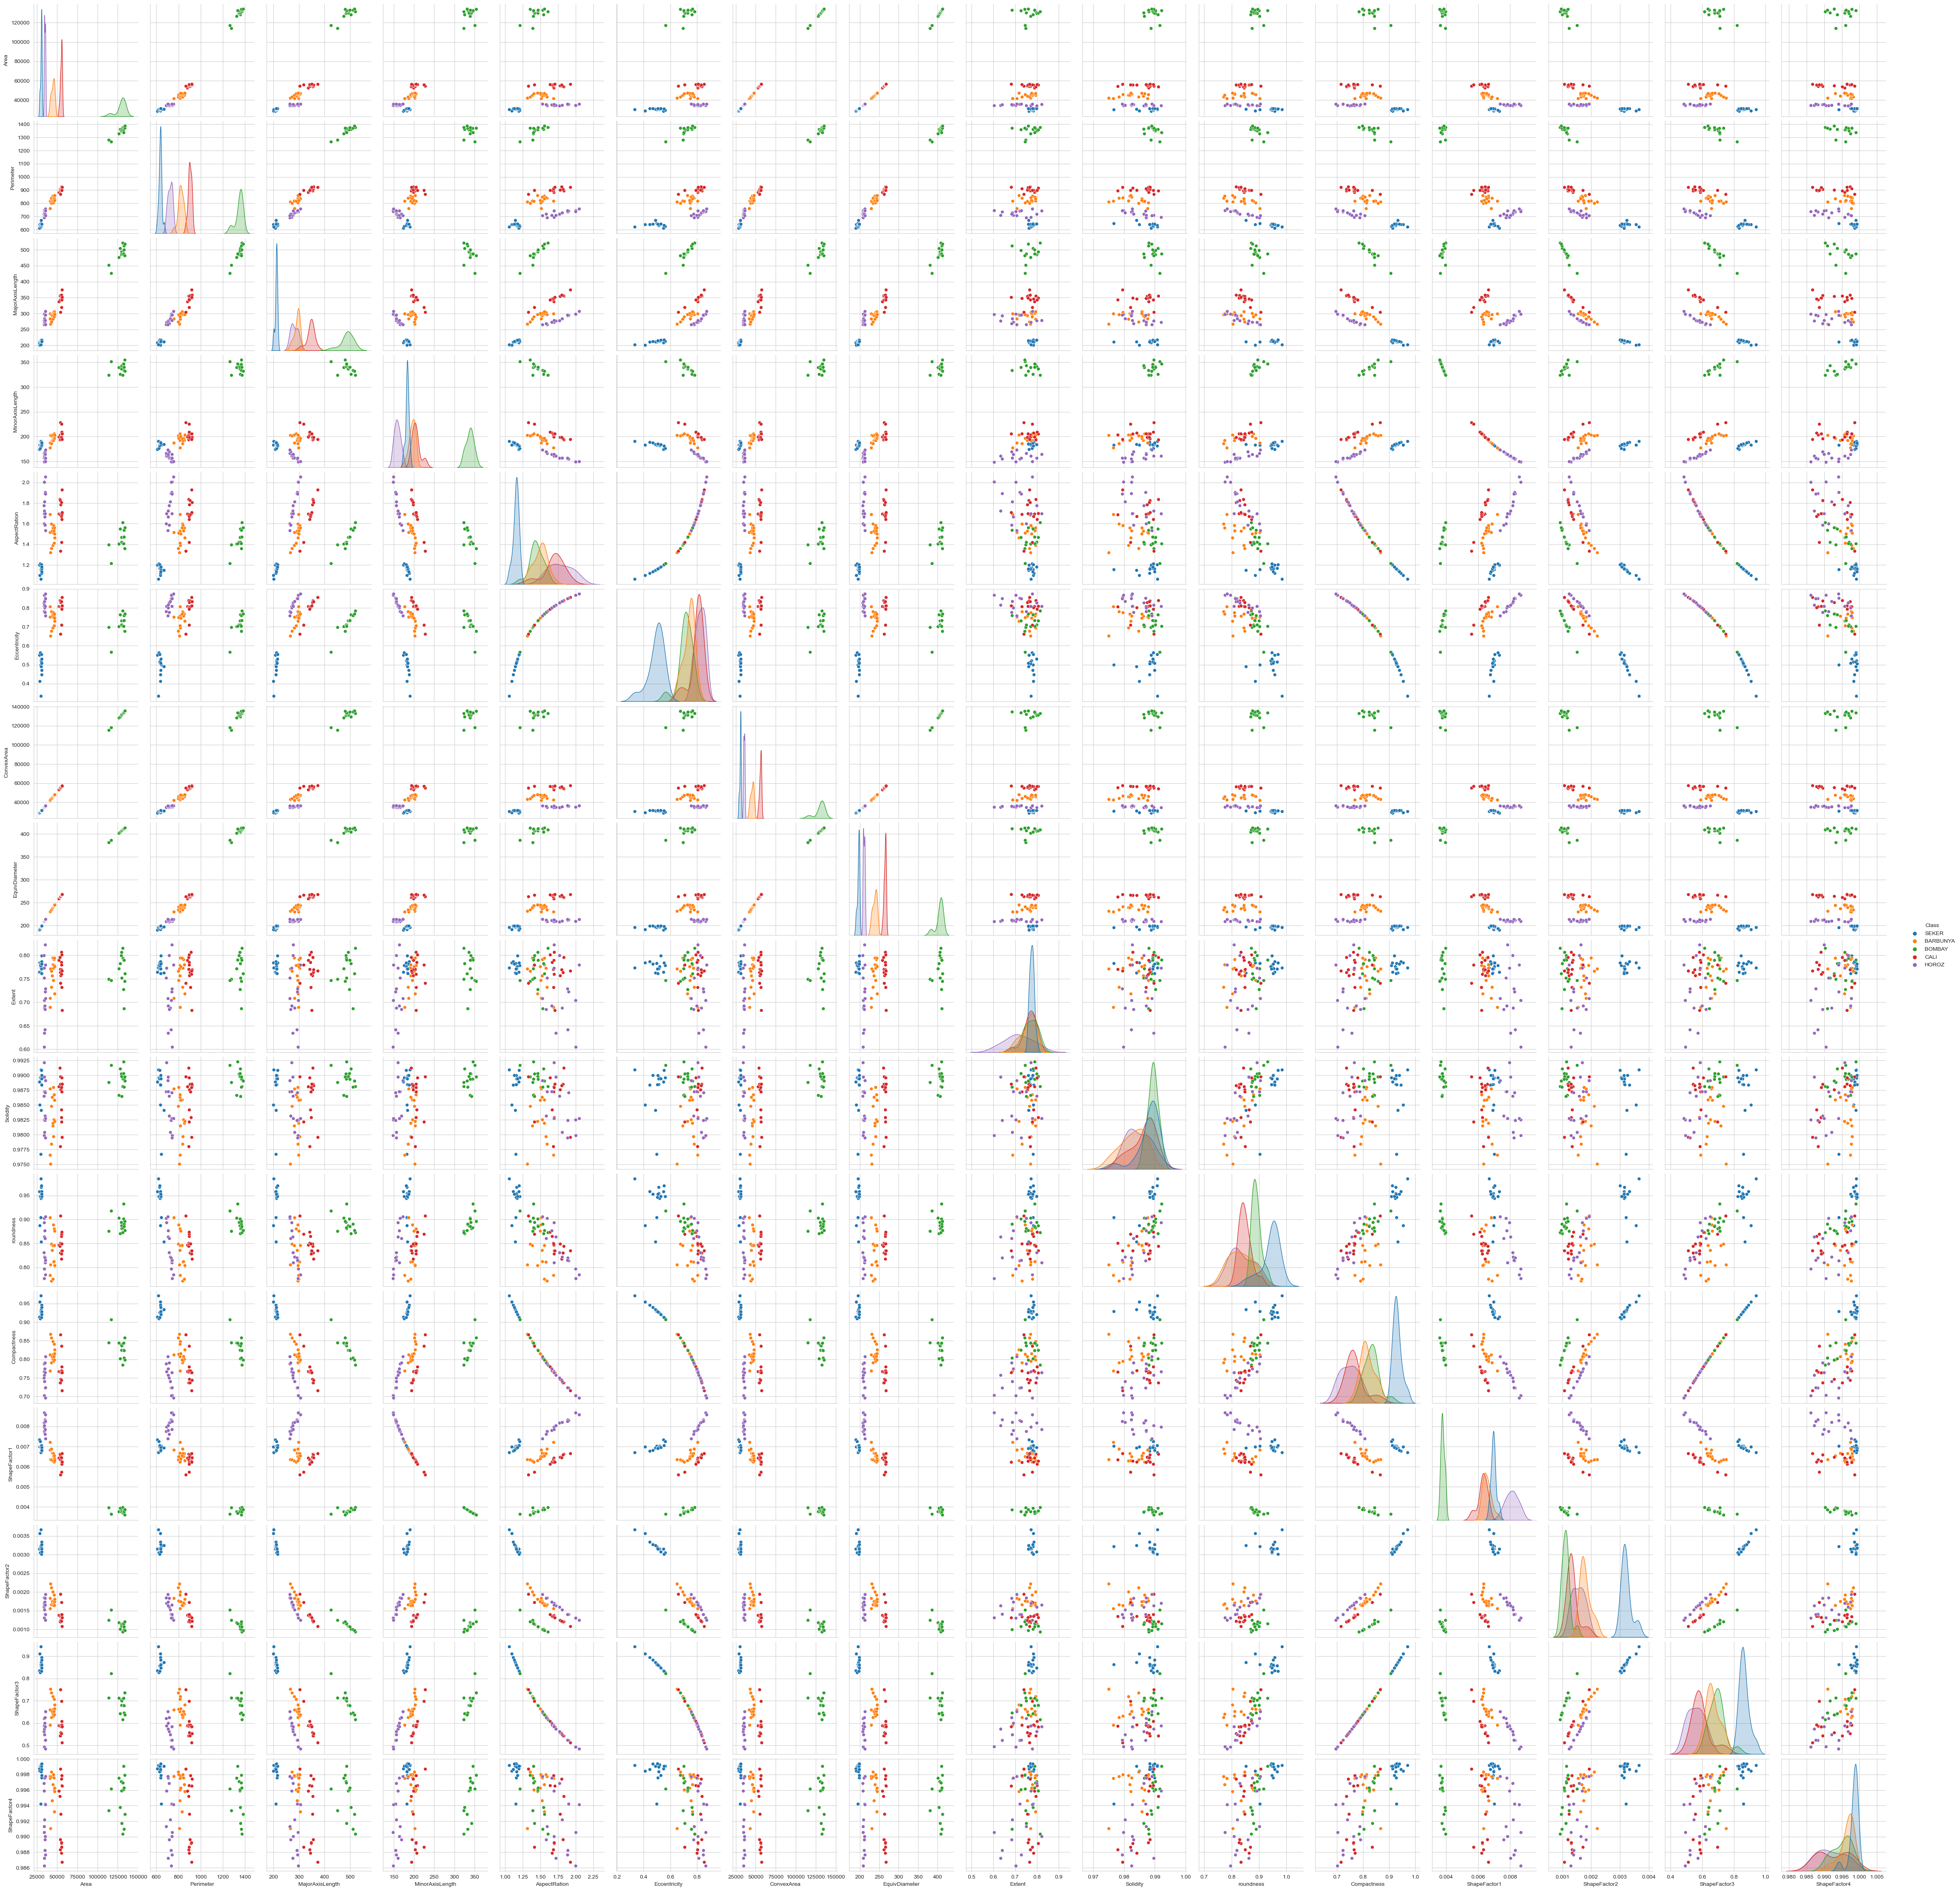

In [21]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Class",size=3);
plt.show()

In [14]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


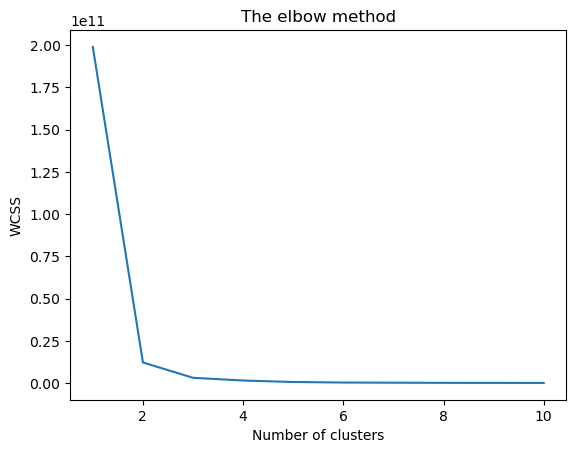

In [15]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [16]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

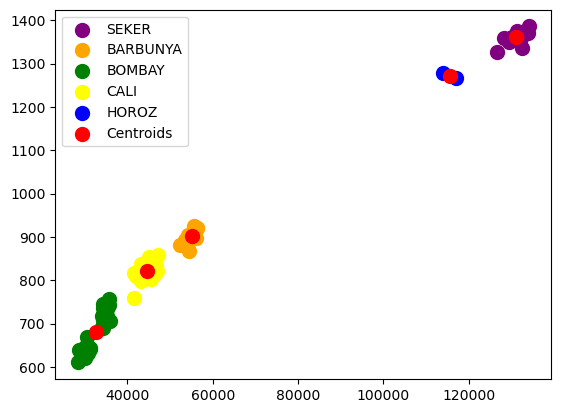

In [19]:
# iris_1=iris.loc[iris["Class"]=="SEKER"]
# iris_2=iris.loc[iris["Class"]=="BARBUNYA"]
# iris_3=iris.loc[iris["Class"]=="BOMBAY"]
# iris_4=iris.loc[iris["Class"]=="CALI"]
# iris_5=iris.loc[iris["Class"]=="HOROZ"]
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'SEKER')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'BARBUNYA')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'BOMBAY')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'CALI')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'HOROZ')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

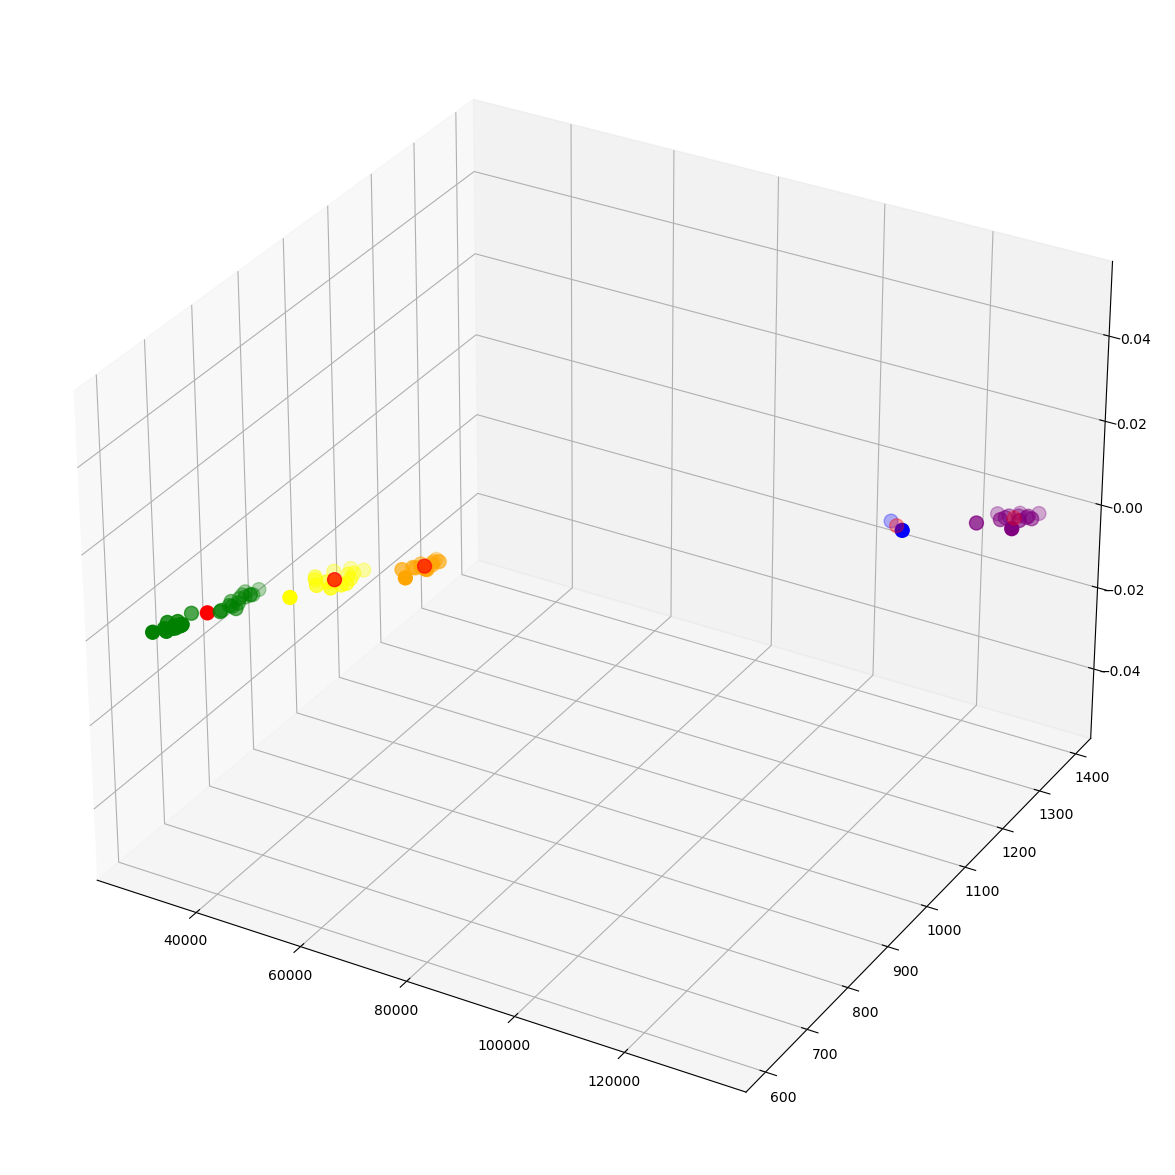

In [20]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
# plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
# plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'SEKER')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'BARBUNYA')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'BOMBAY')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'CALI')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'HOROZ')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()